In [105]:
import matplotlib.pyplot as plt
import mplcursors
import pandas as pd
import numpy as np
import openpyxl
from dtaidistance import dtw

In [106]:
xls = 'xls/Climat_Corr.xlsx'
df = pd.read_excel(xls, sheet_name = 'SI ')

In [64]:
df

,janvier,février,mars,avril,mai,juin,juillet,août,septembre,octobre,novembre,décembre
0,-5,-7.0,-7,2.0,12,17.0,20,20,16.0,6,0.0,-6
1,-6,-6.0,-8,3.0,14,16.0,20,19,14.0,2,1.0,-4
2,-5,-5.0,-5,4.0,15,17.0,17,19,15.0,3,2.0,-8
3,-3,-6.0,-3,6.0,16,14.0,18,18,13.0,4,3.0,-9
4,-6,-8.0,-2,4.0,13,15.0,17,17,12.0,3,4.0,-9
5,-11,-9.0,1,5.0,12,17.0,17,18,10.0,2,3.0,-9
6,-6,5.0,2,4.0,8,17.0,16,16,12.0,4,4.0,-8
7,-8,-11.0,1,6.0,7,15.0,17,17,11.0,5,5.0,-4
8,-11,-12.0,1,7.0,6,14.0,17,15,11.0,3,5.0,-3
9,-8,-9.0,2,7.0,5,15.0,15,14,12.0,4,-1.0,-8


In [67]:
#Maximum par mois
df.max()

janvier      -3.0
février       5.0
mars          7.0
avril        16.0
mai          18.0
juin         22.0
juillet      26.0
août         26.0
septembre    16.0
octobre       7.0
novembre      5.0
décembre     -3.0
dtype: float64

In [68]:
#Minimum par mois
df.min()

janvier     -23.0
février     -12.0
mars         -8.0
avril         2.0
mai           5.0
juin         11.0
juillet      13.0
août         14.0
septembre     6.0
octobre       1.0
novembre     -8.0
décembre    -11.0
dtype: float64

In [69]:
#Maximum de l'année
df.max().max()

26.0

In [70]:
#Minimum de l'année
df.min().min()

-23.0

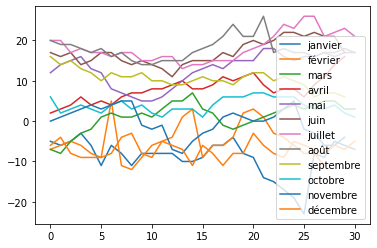

In [76]:
#temperature de tout les mois
df.plot();

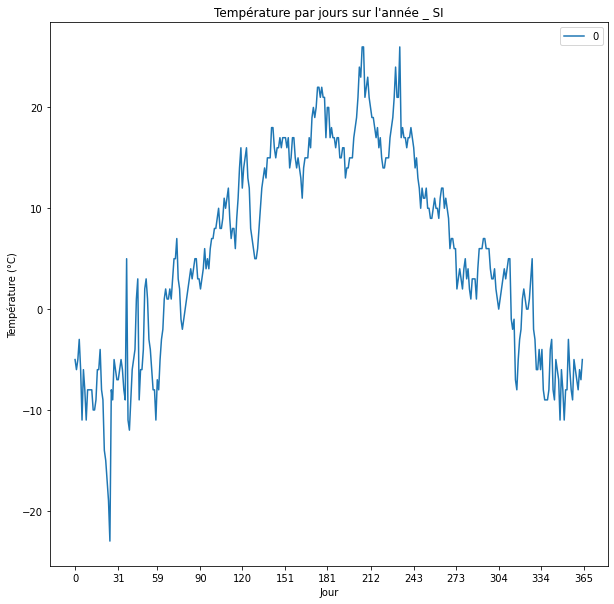

In [81]:
#courbe pour l'année
df_F = pd.DataFrame(data=df.values.flatten(order='F'))
df_F = df_F.dropna()
df_F = df_F.reset_index(drop=True)
df_F
df_F.plot(figsize=(10, 10),xticks=[0,31,59,90,120,151,181,212,243,273,304,334,365])

plt.xlabel('Jour')
plt.ylabel('Température (°C)')
plt.title("Température par jours sur l'année _ SI")
plt.legend()

mplcursors.cursor()

c:\users\serge porcaint\appdata\local\programs\python\python38-32\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


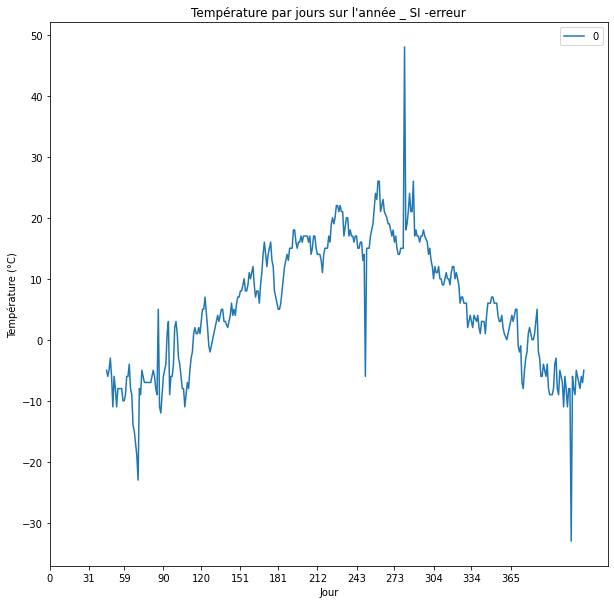

In [82]:
xls = 'xls/Climat.xlsx'
df_E = pd.read_excel(xls, sheet_name = 'SI -erreur')

df_E = pd.DataFrame(data=df_E.values.flatten(order='F'))
df_E = df_E.dropna()
df_E = df_E.reset_index(drop=True)

#suppression des erreurs
df_E[df_E[0].str.contains('[^-0-9\/]+')==True] = ''

#convertion
df_E[0] = pd.to_numeric(df_E[0], downcast='float')

#calcul des vides
df_E[0] = df_E[0].interpolate(method='linear')
#graphique annuel
df_E.plot(figsize=(10, 10),xticks=[0,31,59,90,120,151,181,212,243,273,304,334,365])

plt.xlabel('Jour')
plt.ylabel('Température (°C)')
plt.title("Température par jours sur l'année _ SI -erreur")
plt.legend()

mplcursors.cursor()

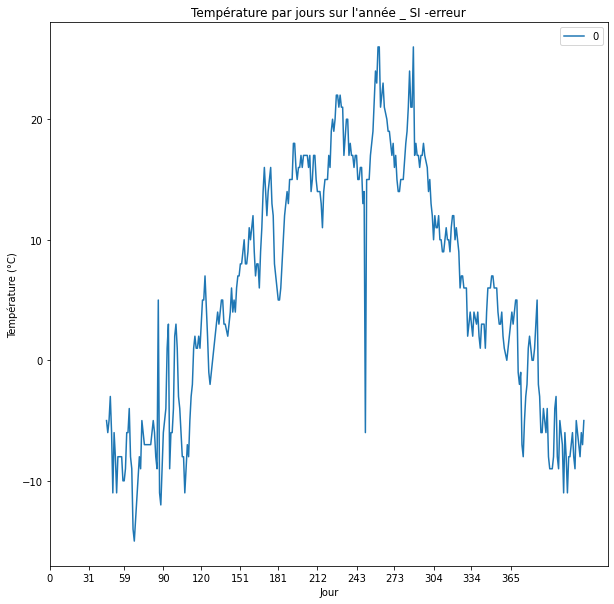

In [83]:
#Correction de la premiere version en retirant les valeurs extremes
df_E = df_E[abs(df_E - np.mean(df_E)) < 2 * np.std(df_E)]
df_E[0] = df_E[0].interpolate(method='linear')

df_E.plot(figsize=(10, 10),xticks=[0,31,59,90,120,151,181,212,243,273,304,334,365])
plt.xlabel('Jour')
plt.ylabel('Température (°C)')
plt.title("Température par jours sur l'année _ SI -erreur")
plt.legend()

mplcursors.cursor()

c:\users\serge porcaint\appdata\local\programs\python\python38-32\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


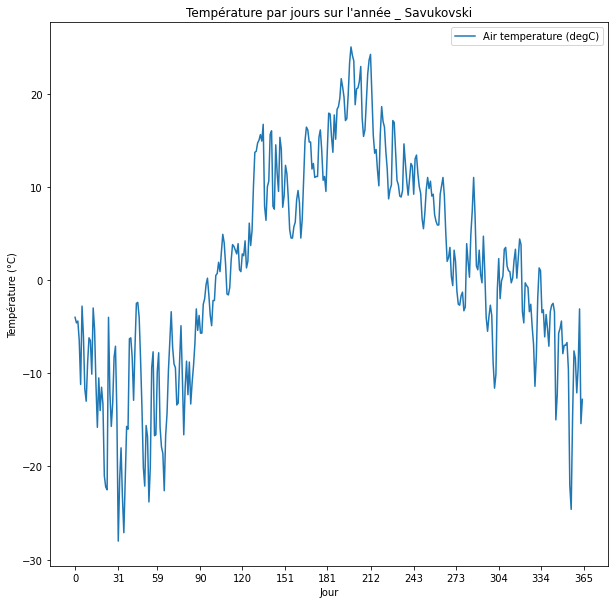

In [92]:
#récupération du fichier excel 
xls_Station = 'xls/Savukoski_kirkonkyla.xlsx'
df_Station = pd.read_excel(xls_Station, sheet_name = 'Observation data')

ax = df_Station.plot(figsize=(10, 10),xticks=[0,31,59,90,120,151,181,212,243,273,304,334,365], y="Air temperature (degC)")


plt.xlabel('Jour')
plt.ylabel('Température (°C)')
plt.title("Température par jours sur l'année _ Savukovski")
plt.legend()

mplcursors.cursor()

In [99]:
#récupération du fichier
xls_prague = 'xls/prague.xlsx'
df_prague = pd.read_excel(xls_prague)

xls_helsinki = 'xls/helsinki.xlsx'
df_helsinki = pd.read_excel(xls_helsinki)

xls_oslo = 'xls/oslo.xlsx'
df_oslo = pd.read_excel(xls_oslo)

xls_moscou = 'xls/moscou.xlsx'
df_moscou = pd.read_excel(xls_moscou)

#création d'un dataset pour les comparaisons de moyenne de températures
df_moy_city = pd.DataFrame(df_prague.mean())
df_moy_city =  df_moy_city.rename(columns={0: 'prague'})
df_moy_city['helsinki'] = pd.DataFrame(df_helsinki.mean())
df_moy_city['oslo'] = pd.DataFrame(df_oslo.mean())
df_moy_city['moscou'] = pd.DataFrame(df_moscou.mean())

df_moy = pd.DataFrame(df.mean())
df_Koin_moy = df_moy.T
df_moy_2 = df_moy_city.T

    
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

near_cit = []
#recherche pour chaque mois de la ville la plus proche en terme de temperature moyenne
for i in df_moy_2.columns:
    value = find_nearest(df_moy_2[i], df_Koin_moy[i][0])
    nearest = df_moy_2[df_moy_2[i] == value]
    data_top = nearest.head()
    nearest_city = list(data_top.index)   
    print(i, ':', nearest_city)

janvier : ['moscou']
février : ['oslo']
mars : ['prague']
avril : ['moscou']
mai : ['helsinki']
juin : ['moscou']
juillet : ['moscou']
août : ['helsinki']
septembre : ['oslo']
octobre : ['oslo']
novembre : ['moscou']
décembre : ['moscou']


In [102]:
#création d'un nouveau DataSet pour cette fois ci la comparaison des écarts types
df_EC_city = pd.DataFrame(df_prague.std())
df_EC_city =  df_EC_city.rename(columns={0: 'prague'})
df_EC_city['helsinki'] = pd.DataFrame(df_helsinki.std())
df_EC_city['oslo'] = pd.DataFrame(df_oslo.std())
df_EC_city['moscou'] = pd.DataFrame(df_moscou.std())

df_EC = pd.DataFrame(df.std())
df_Koin_EC = df_EC.T
df_EC_2 = df_EC_city.T

nearest_std_cities = []

for i in df_EC_2.columns:
    value = find_nearest(df_EC_2[i], df_Koin_EC[i][0])
    nearest = df_EC_2[df_EC_2[i] == value]
    data_top = nearest.head()
    nearest_city = list(data_top.index)   
    print(i, ':', nearest_city)

janvier : ['helsinki']
février : ['moscou']
mars : ['oslo']
avril : ['helsinki']
mai : ['helsinki']
juin : ['helsinki']
juillet : ['helsinki']
août : ['oslo']
septembre : ['oslo']
octobre : ['prague']
novembre : ['helsinki']
décembre : ['prague']
